## Imports

In [649]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [650]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [651]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Globals

In [652]:
RANDOM_STATE: int = 30
DATA_PATH = "../data/HCVdata.csv"

In [653]:
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Part I: Exercises

### Exercise 1

In [654]:
dist_matrix = [0.3, 0.4, 0.7, 0.5, 0.8, 0.45]
labels = [1, 2, 3, 4]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, np.float64(0.3), np.float64(0.3), 0.0],
  [0.0, np.float64(0.45), np.float64(0.45), 0.0],
  [np.float64(0.3), np.float64(0.8), np.float64(0.8), np.float64(0.45)]],
 'ivl': [1, 2, 3, 4],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

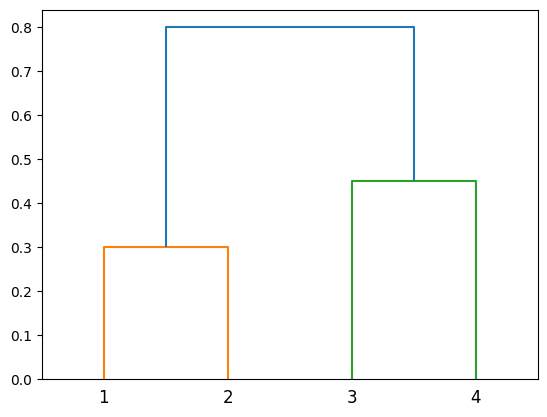

In [655]:
# Complete linkage

complete_link = linkage(dist_matrix, "complete")
dendrogram(complete_link, labels=labels)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, np.float64(0.3), np.float64(0.3), 0.0],
  [0.0, np.float64(0.4), np.float64(0.4), np.float64(0.3)],
  [0.0, np.float64(0.45), np.float64(0.45), np.float64(0.4)]],
 'ivl': [4, 3, 1, 2],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

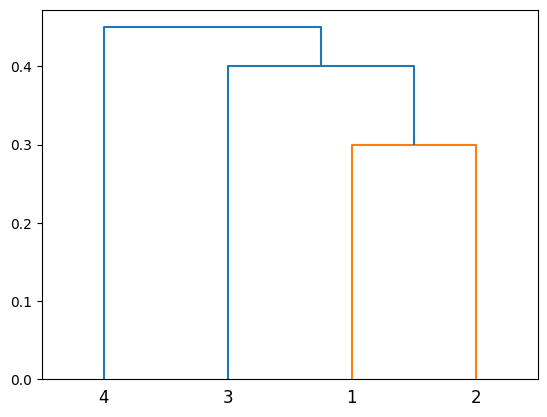

In [656]:
# Single linkage

single_link = linkage(dist_matrix, "single")
dendrogram(single_link, labels=labels)

In [657]:
print(cut_tree(complete_link, n_clusters=2))

[[0]
 [0]
 [1]
 [1]]


In [658]:
print(cut_tree(single_link, n_clusters=2))

[[0]
 [0]
 [0]
 [1]]


### Exercise 2

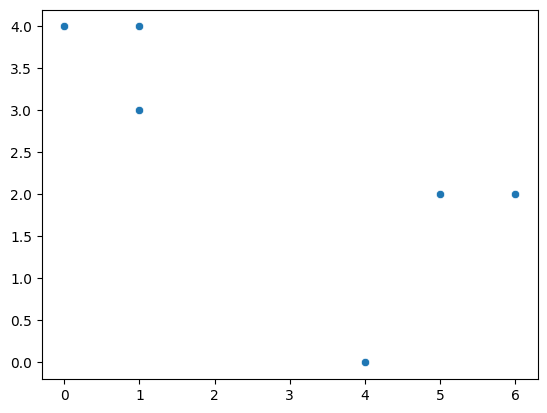

In [659]:
observations = [[1, 1, 0, 5, 6, 4], [4, 3, 4, 2, 2, 0]]
df = pd.DataFrame(observations).T
df.columns = ["x1", "x2"]

sns.scatterplot(x=observations[0], y=observations[1])
plt.show()

In [660]:
df.head()

,x1,x2
0,1,4
1,1,3
2,0,4
3,5,2
4,6,2


#### Clustering

In [661]:
label = [1, 2]
labelled_observations = [random.choice(label) for _ in range(len(observations[0]))]

print(labelled_observations)

[2, 1, 1, 2, 1, 2]


In [662]:
df["label"] = labelled_observations

In [663]:
def compute_centroids(df: pd.DataFrame) -> tuple[list[int], list[int]]:
    centroid1 = df[df["label"] == 1][["x1", "x2"]].mean().tolist()
    centroid2 = df[df["label"] != 1][["x1", "x2"]].mean().tolist()

    return centroid1, centroid2

In [664]:
c1, c2 = compute_centroids(df)

print(c1, c2)

[2.3333333333333335, 3.0] [3.3333333333333335, 2.0]


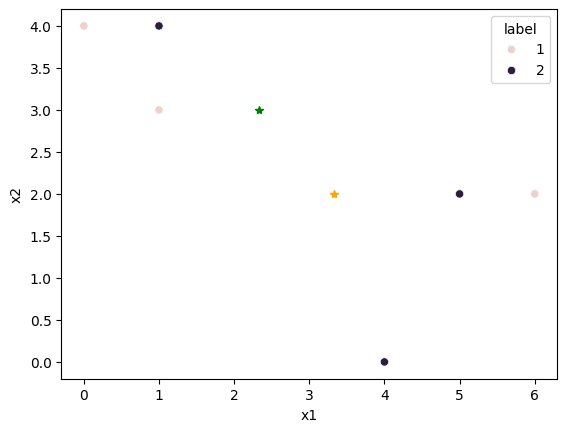

In [665]:
plt.plot(c1[0], c1[1], "*", color="green")
plt.plot(c2[0], c2[1], "*", color="orange")
sns.scatterplot(data=df, x="x1", y="x2", hue="label")
plt.show()

## Part II: Practical Applications

### K-means Clustering

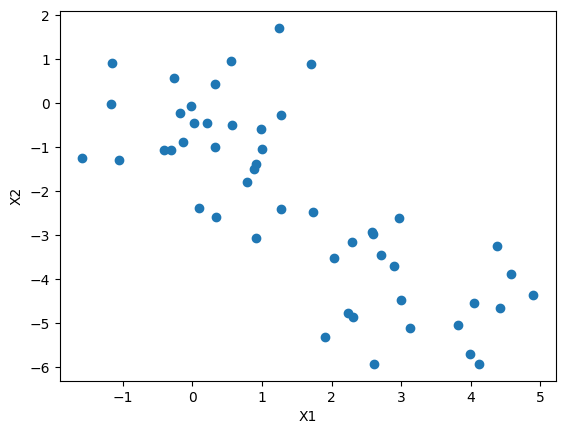

In [666]:
X = np.random.randn(50, 2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

plt.plot(X[:, 0], X[:, 1], "o")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [667]:
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE).fit(X)

print("Cluster labels:")
print(kmeans.labels_)

print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster labels:
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster centers:
[[ 0.2320099  -0.62170967]
 [ 3.05120675 -4.16065557]]


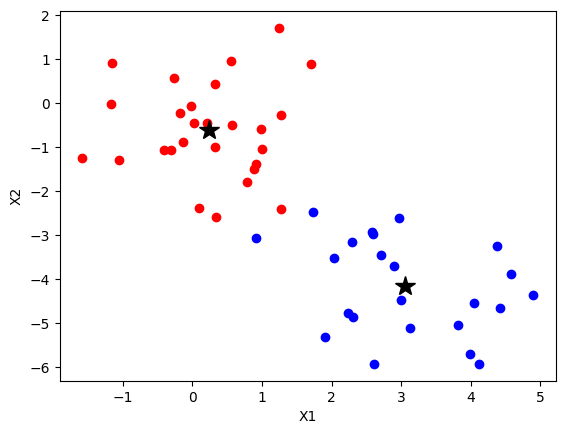

In [668]:
for i in range(X.shape[0]):
    if kmeans.labels_[i] == 0:
        plt.plot(X[i, 0], X[i, 1], "o", color="red")
    else:
        plt.plot(X[i, 0], X[i, 1], "o", color="blue")

c1 = kmeans.cluster_centers_[0]
c2 = kmeans.cluster_centers_[1]

plt.plot(c1[0], c1[1], "*", color="black", markersize=15)
plt.plot(c2[0], c2[1], "*", color="black", markersize=15)

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [669]:
dfHVC = pd.read_csv(DATA_PATH, index_col=0)

dfHVC.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [670]:
dfHVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [671]:
dfHVC = dfHVC.dropna().copy()

dfHVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 1 to 613
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 64.4+ KB


In [672]:
print(dfHVC["Sex"].unique())

print(dfHVC["Category"].unique())

['m' 'f']
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


#### Questions 

1. How many observations are there ?
    - 615, although after dropping na values, 589 
2. How many variables are there ?
    - 13
3. What type of variables (numeric, categorical) ?
    - 11 numerical
    - 2 categorical 
4. For each categorical variable (if any) give the number of levels and categories.
    - Sex - ['m' 'f'], 
    - Category - ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
    '3=Cirrhosis']

In [673]:
numeric_cols = dfHVC.select_dtypes(include="number")

scaler = StandardScaler()
dfHVC_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_cols),
    columns=numeric_cols.columns,
    index=numeric_cols.index,
)

dfHVC_scaled.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,-1.553745,-0.542701,-0.603230,-0.905494,-0.355457,-0.202289,-0.581777,-1.916091,0.480336,-0.481022,-0.540788
2,-1.553745,-0.542701,0.084054,-0.411380,-0.276283,-0.409283,1.354993,-0.524241,-0.151402,-0.416513,0.862566
3,-1.553745,0.916417,0.253944,0.461714,0.573318,-0.282787,0.290683,-0.169629,0.085500,-0.092127,1.386485
4,-1.553745,0.273710,-0.622536,0.193070,-0.340231,0.453193,-0.399063,-0.577433,-0.032951,-0.081068,0.712875
5,-1.553745,-0.421108,0.230777,0.289014,-0.273238,-0.081542,0.432286,-0.949775,-0.111918,-0.152949,-0.596922


In [674]:
kmeans4 = KMeans(
    n_clusters=4,
    n_init=50,
    random_state=1000
).fit(dfHVC_scaled)

dfHVC_Kmeans4_labels = kmeans4.labels_

pd.crosstab(
    index=dfHVC['Category'],
    columns=dfHVC_Kmeans4_labels,
    rownames=["Real groups"],
    colnames=["K-means clusters"]
)

K-means clusters,0,1,2,3
Real groups,,,,
0=Blood Donor,265,257,4,0
0s=suspect Blood Donor,0,1,6,0
1=Hepatitis,12,6,2,0
2=Fibrosis,10,2,0,0
3=Cirrhosis,2,0,19,3


In [675]:
kmeans3 = KMeans(
    n_clusters=3,
    n_init=50,
    random_state=1000
).fit(dfHVC_scaled)

pd.crosstab(
    dfHVC['Category'],
    kmeans3.labels_,
    rownames=["Real groups"],
    colnames=["K-means clusters"]
)

K-means clusters,0,1,2
Real groups,,,
0=Blood Donor,248,0,278
0s=suspect Blood Donor,3,3,1
1=Hepatitis,10,2,8
2=Fibrosis,8,0,4
3=Cirrhosis,7,17,0


### Hierarchical Clustering

In [676]:
H_complete = linkage(dfHVC_scaled, method="complete")
H_average = linkage(dfHVC_scaled, method="average")
H_single = linkage(dfHVC_scaled, method="single")

In [677]:
clusters_complete = cut_tree(H_complete, n_clusters=4).flatten()
clusters_average = cut_tree(H_average, n_clusters=4).flatten()
clusters_single = cut_tree(H_single, n_clusters=4).flatten()

print(pd.crosstab(dfHVC['Category'], clusters_complete))
print(pd.crosstab(dfHVC['Category'], clusters_average))
print(pd.crosstab(dfHVC['Category'], clusters_single))

col_0                     0  1  2  3
Category                            
0=Blood Donor           526  0  0  0
0s=suspect Blood Donor    5  2  0  0
1=Hepatitis              20  0  0  0
2=Fibrosis               12  0  0  0
3=Cirrhosis              22  0  1  1
col_0                     0  1  2  3
Category                            
0=Blood Donor           526  0  0  0
0s=suspect Blood Donor    6  1  0  0
1=Hepatitis              20  0  0  0
2=Fibrosis               12  0  0  0
3=Cirrhosis              22  0  1  1
col_0                     0  1  2  3
Category                            
0=Blood Donor           526  0  0  0
0s=suspect Blood Donor    6  1  0  0
1=Hepatitis              20  0  0  0
2=Fibrosis               12  0  0  0
3=Cirrhosis              22  0  1  1


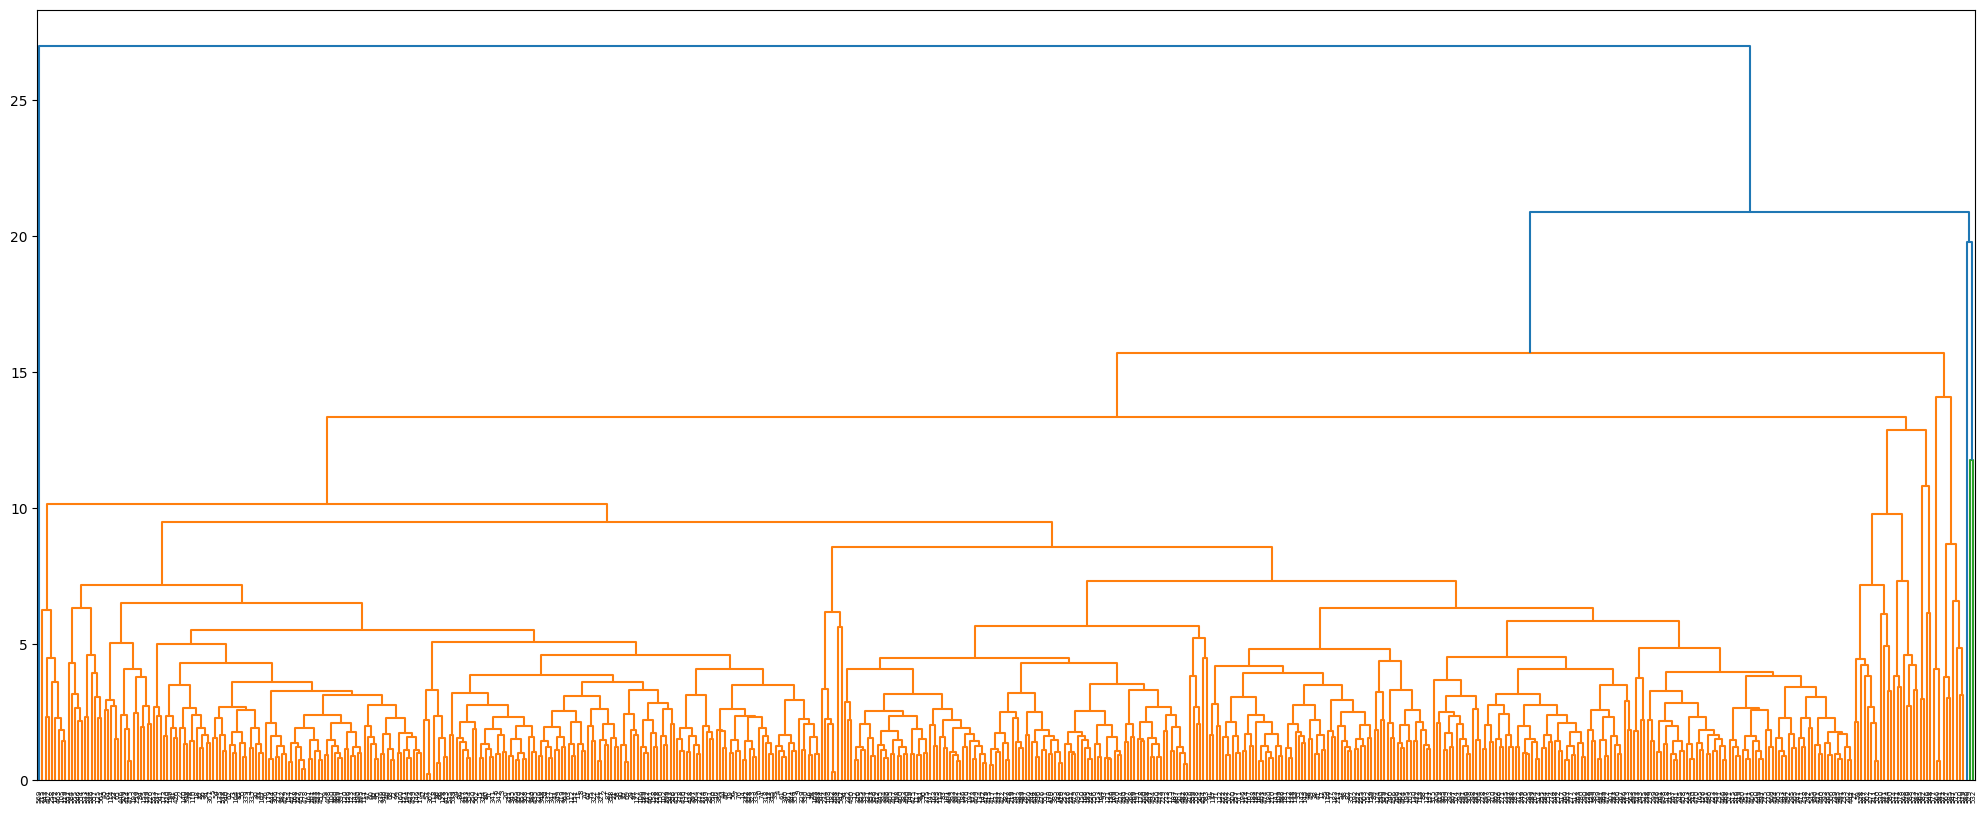

In [678]:
plt.figure(figsize=(25,10))
dendrogram(H_complete)
plt.show()